# Effects of Educational Attainment and on Family Size

### Summary: Fertility rates are declining around the world (Bongaarts and Hodgson, 2022) and while there are multiple factors, this brief study analyzes the relationship of educational attainment on family size using data from the Family Income and Expenditure Survey (FIES) conducted by the Philippine Statistics Authority (PSA) in 2017. For convenience, a standard OLS regression, and some preceding tests, was used.

### The research determines that:
1. Educational Attainment moderately correlates with Family Size (i.e. families where the household head has a higher level of education tend to have smaller family sizes)

In [1]:
### Import family income and expenditure dataset from Kaggle

import kagglehub
import kaggle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
#configure local path
config_path = 'D:/Jupyter Data Sets'

# Authenticate Kaggle API
kaggle.api.authenticate()

# Download the latest version of the dataset
kaggle.api.dataset_download_files(
    dataset='grosvenpaul/family-income-and-expenditure',
    path=config_path,
    unzip=True
)

In [2]:
#Open CSV
file_path = r'D:/Jupyter Data Sets/Family Income and Expenditure.csv'
FIES = pd.read_csv(file_path)
FIES.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


### Educational Attainment has many categories in the dataset. Similar levels of education are lumped into ordinal categories as follows:
0 - Preschool or Less | 1 - Elementary Graduate or Less | 2 - High School Graduate or Less | 3 - College Graduate or Less | 4 - Postgraduate Studies | 5 - Vocational/Technical Programs | 6 - Others

In [3]:
#Create new categorical columns to display household head's education level based on "Household Head Highest Grade Completed".
#Categories are from 0-6

FIES.loc[
    FIES["Household Head Highest Grade Completed"].isin([
        "No Grade Completed","Preschool"
    ]),
    "Household Educational Bucket"
] = 0

FIES.loc[
    FIES["Household Head Highest Grade Completed"].isin([
        "Grade 1","Grade 2","Grade 3","Grade 4","Grade 5","Grade 6","Elementary Graduate"
    ]),
    "Household Educational Bucket"
] = 1

FIES.loc[
    FIES["Household Head Highest Grade Completed"].str.contains("High School",case=False),
    "Household Educational Bucket"
] = 2

FIES.loc[
    FIES["Household Head Highest Grade Completed"].str.contains("College",case=False),
    "Household Educational Bucket"
] = 3

FIES.loc[
    FIES["Household Head Highest Grade Completed"].isin([
        "Post Baccalaureate"
    ]),
    "Household Educational Bucket"
] = 4

FIES.loc[
    FIES["Household Head Highest Grade Completed"].str.contains("Programs",case=False),
    "Household Educational Bucket"
] = 5

FIES.loc[
    FIES["Household Educational Bucket"].isnull(),
    "Household Educational Bucket"
] = 6

### Next, 

Spearman Correlation: -0.0531


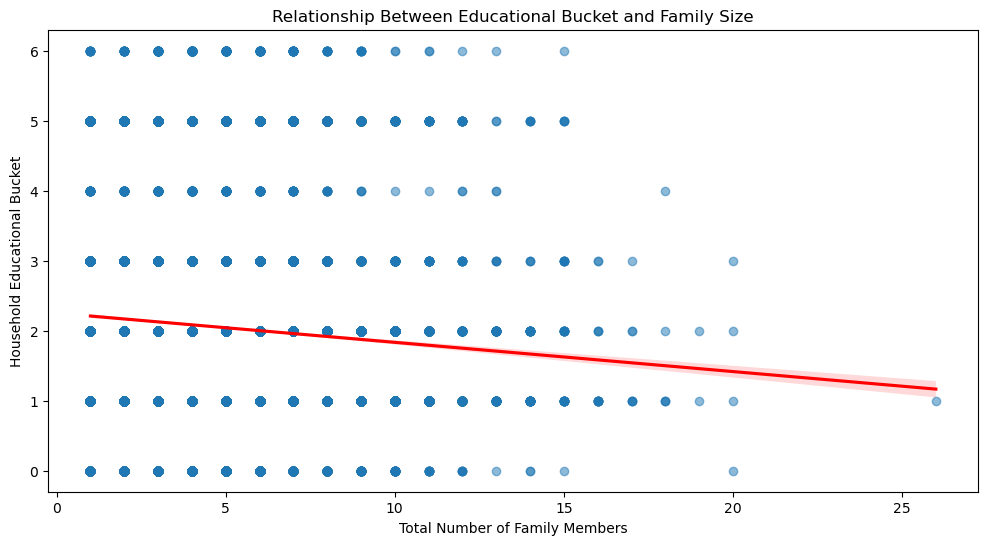

In [10]:
## Looking for correlation in the data

# Data Cleaning: Ensure both columns are numeric
FIES['Household Educational Bucket'] = pd.to_numeric(FIES['Household Educational Bucket'], errors='coerce')
FIES['Total Number of Family members'] = pd.to_numeric(FIES['Total Number of Family members'], errors='coerce')

# Drop rows with NaN in either column
FIES = FIES.dropna(subset=['Household Educational Bucket', 'Total Number of Family members'])

correlation = FIES['Total Number of Family members'].corr(FIES['Household Educational Bucket'],method='spearman')
print(f'Spearman Correlation: {correlation:.4f}')

plt.figure(figsize=(12, 6))
sns.regplot(
    data=FIES,
    x='Total Number of Family members',
    y='Household Educational Bucket',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Relationship Between Educational Bucket and Family Size')
plt.xlabel('Total Number of Family Members')
plt.ylabel('Household Educational Bucket')
plt.show()

In [9]:
Y = FIES['Total Number of Family members']
X = FIES['Household Educational Bucket']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

# Display the summary
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Total Number of Family members   R-squared:                       0.005
Model:                                        OLS   Adj. R-squared:                  0.005
Method:                             Least Squares   F-statistic:                     198.2
Date:                            Sat, 28 Dec 2024   Prob (F-statistic):           6.42e-45
Time:                                    14:38:14   Log-Likelihood:                -93093.
No. Observations:                           41544   AIC:                         1.862e+05
Df Residuals:                               41542   BIC:                         1.862e+05
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      